<a href="https://colab.research.google.com/github/ariabishma/tensorflow_neuralnet/blob/master/tensorflow_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import urllib.request as request
import matplotlib.pyplot as plt

In [0]:
IRIS_TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
train = pd.read_csv(IRIS_TRAIN_URL, names=names, skiprows=1)
test = pd.read_csv(IRIS_TEST_URL, names=names, skiprows=1)

# Train and test input data
Xtrain = train.drop("species", axis=1)
Xtest = test.drop("species", axis=1)

# Encode target values into binary ('one-hot' style) representation
ytrain = pd.get_dummies(train.species)
ytest = pd.get_dummies(test.species)

In [0]:
def create_train_model(hidden_nodes, num_iters):
    
    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(120, 4), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(120, 3), dtype=tf.float64, name='y')

    # Variables for two group of weights between the three layers of the network
    W1 = tf.Variable(np.random.rand(4, hidden_nodes), dtype=tf.float64)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 3), dtype=tf.float64)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Define a loss function
    deltas = tf.square(y_est - y)
#     deltas = math.sqrt((y_est - y) ** 2)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.as_matrix(), y: ytrain.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)
        
    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


loss (hidden nodes: 5, iterations: 2000): 39.24
loss (hidden nodes: 10, iterations: 2000): 5.55
loss (hidden nodes: 8, iterations: 2000): 38.56


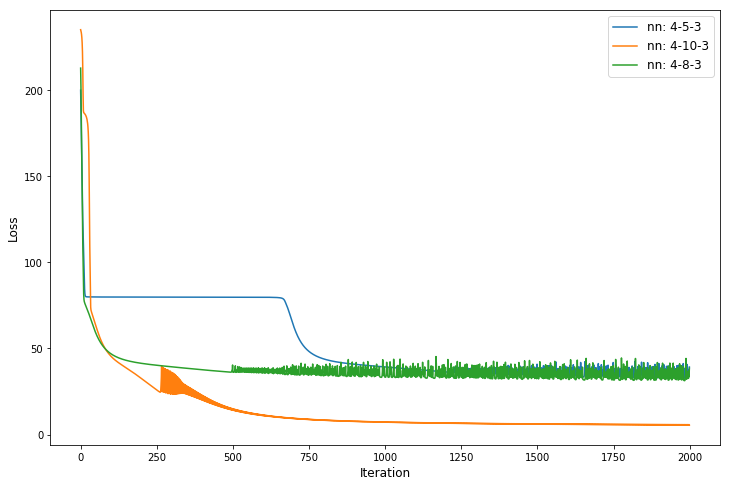

In [8]:
# Run the training for 3 different network architectures: (4-5-3) (4-10-3) (4-20-3)

# Plot the loss function over iterations
num_hidden_nodes = [5, 10, 8]
loss_plot = {5: [], 10: [], 8: []}
weights1 = {5: None, 10: None, 8: None}
weights2 = {5: None, 10: None, 8: None}
num_iters = 2000

plt.figure(figsize=(12,8))
for hidden_nodes in num_hidden_nodes:
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 4-%d-3" % hidden_nodes)
    
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)

In [10]:
X = tf.placeholder(shape=(30, 4), dtype=tf.float64, name='X')
y = tf.placeholder(shape=(30, 3), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})
        tes = sess.run(X, feed_dict={X: Xtest, y: ytest})
        print(tes)
        print(Xtest)
       

    # Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, ytest.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 4-%d-3, accuracy: %.2f%%' % (hidden_nodes, accuracy))

[[5.9 3.  4.2 1.5]
 [6.9 3.1 5.4 2.1]
 [5.1 3.3 1.7 0.5]
 [6.  3.4 4.5 1.6]
 [5.5 2.5 4.  1.3]
 [6.2 2.9 4.3 1.3]
 [5.5 4.2 1.4 0.2]
 [6.3 2.8 5.1 1.5]
 [5.6 3.  4.1 1.3]
 [6.7 2.5 5.8 1.8]
 [7.1 3.  5.9 2.1]
 [4.3 3.  1.1 0.1]
 [5.6 2.8 4.9 2. ]
 [5.5 2.3 4.  1.3]
 [6.  2.2 4.  1. ]
 [5.1 3.5 1.4 0.2]
 [5.7 2.6 3.5 1. ]
 [4.8 3.4 1.9 0.2]
 [5.1 3.4 1.5 0.2]
 [5.7 2.5 5.  2. ]
 [5.4 3.4 1.7 0.2]
 [5.6 3.  4.5 1.5]
 [6.3 2.9 5.6 1.8]
 [6.3 2.5 4.9 1.5]
 [5.8 2.7 3.9 1.2]
 [6.1 3.  4.6 1.4]
 [5.2 4.1 1.5 0.1]
 [6.7 3.1 4.7 1.5]
 [6.7 3.3 5.7 2.5]
 [6.4 2.9 4.3 1.3]]
    sepal-length  sepal-width  petal-length  petal-width
0            5.9          3.0           4.2          1.5
1            6.9          3.1           5.4          2.1
2            5.1          3.3           1.7          0.5
3            6.0          3.4           4.5          1.6
4            5.5          2.5           4.0          1.3
5            6.2          2.9           4.3          1.3
6            5.5          4.2 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
